In [3]:
#Import the packages we may use in this project.
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)


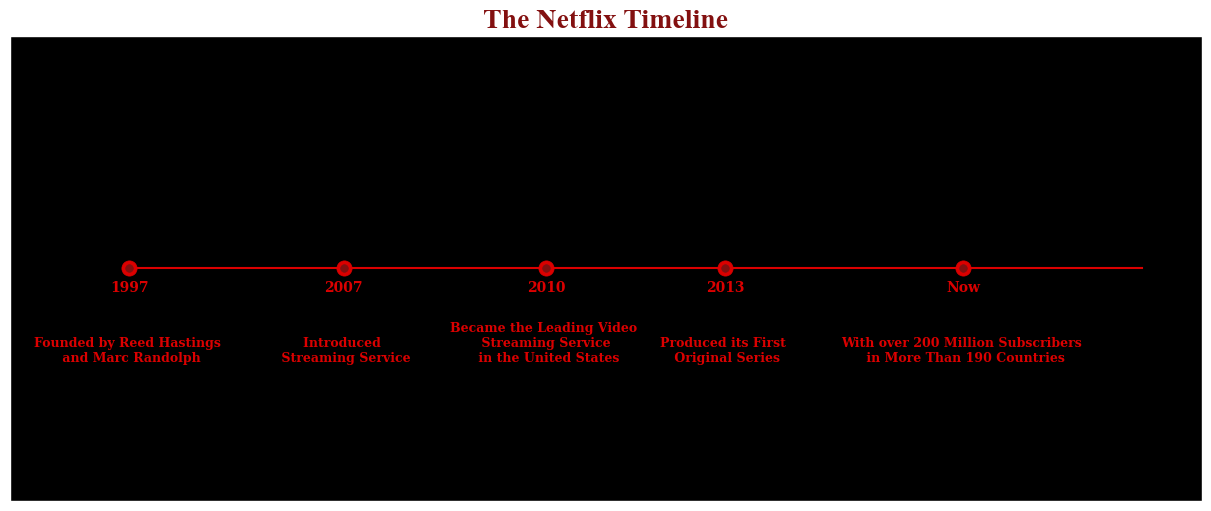

In [4]:
from datetime import datetime


tl_dates = [
    "1997",
    "2007",
    "2010",
    "2013",
    'Now']

tl_x = [1,2.8,4.5,6,8]


tl_text = [
    "Founded by Reed Hastings \n and Marc Randolph", "Introduced \n Streaming Service", "Became the Leading Video \n Streaming Service \n in the United States",
    "Produced its First \n Original Series",
    "With over 200 Million Subscribers \n in More Than 190 Countries"]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)
#By using fig, ax = plt.subplots(...), we are assigning the figure object to the variable fig and the subplot object to the variable ax. 
#This allows us to reference and manipulate both the figure and subplot objects separately if needed.
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)
ax.set_facecolor("#000000")

# Timeline : line
ax.axhline(y=0, xmin=0.1, xmax=0.95, color='#db0000', zorder=1)
# Timeline : Date Points
ax.scatter(x=tl_x, y=np.zeros(len(tl_x)), s=120, color='#db0000', zorder=2)
ax.scatter(x=tl_x, y=np.zeros(len(tl_x)), s=30, c='#831010', zorder=3)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x=x, y=-0.2, s=date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#db0000') #ha='center' which centers the text horizontally at the given x-coordinate.

# Text
for x, txt in zip(tl_x, tl_text):
    ax.text(x=x, y=-0.8, s=txt, ha='center', 
            fontfamily='serif', fontweight='bold', fontsize=9,
            color='#db0000')

# Remove Ticks from the graphic
ax.set_xticks([])
ax.set_yticks([]) 

# Title
ax.set_title("The Netflix Timeline", fontweight="bold", fontfamily='Times New Roman', fontsize=20, color='#831010')


plt.show()

In [5]:
#Load netflix dataset.
df = pd.read_csv('netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [6]:
#to check for missing values,
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#replacing the missing values
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace  = True)
df['director'].replace(np.nan, 'No Data', inplace  = True)

#delete missing values
df.dropna(how = 'any', inplace=True)

# drop Duplicates
df.drop_duplicates(inplace= True)

In [8]:
df.describe(include='all')

show_id   type                 title director     cast        country  \
count     8790   8790                  8790     8790     8790           8790   
unique    8790      2                  8790     4527     7679            748   
top         s1  Movie  Dick Johnson Is Dead  No Data  No Data  United States   
freq         1   6126                     1     2621      825           3638   
mean       NaN    NaN                   NaN      NaN      NaN            NaN   
std        NaN    NaN                   NaN      NaN      NaN            NaN   
min        NaN    NaN                   NaN      NaN      NaN            NaN   
25%        NaN    NaN                   NaN      NaN      NaN            NaN   
50%        NaN    NaN                   NaN      NaN      NaN            NaN   
75%        NaN    NaN                   NaN      NaN      NaN            NaN   
max        NaN    NaN                   NaN      NaN      NaN            NaN   

             date_added  release_year rating  duration  \
count              8790   8790.000000   8790      8790   
unique             1765           NaN     14       220   
top     January 1, 2020           NaN  TV-MA  1 Season   
freq                109           NaN   3205      1791   
mean                NaN   2014.183163    NaN       NaN   
std                 NaN      8.825466    NaN       NaN   
min                 NaN   1925.000000    NaN       NaN   
25%                 NaN   2013.000000    NaN       NaN   
50%                 NaN   2017.000000    NaN       NaN   
75%                 NaN   2019.000000    NaN       NaN   
max                 NaN   2021.000000    NaN       NaN   

                           listed_in  \
count                           8790   
unique                           513   
top     Dramas, International Movies   
freq                             362   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

                                              description  
count                                                8790  
unique                                               8758  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [9]:
#Content Type On Netfix
#To show the content available in Pie Chart form

grouped = df[['type']].value_counts().reset_index()
grouped = grouped.rename(columns = {0 : "count"})

fig = px.pie(grouped, values='count', names='type', color_discrete_sequence=px.colors.qualitative.Set3[3:4], width=400, height=400)
fig.show()

In [10]:
#Netflix dataset with only the TV Shows and Movies
df_tv=df[df['type']=='TV Show']
df_movie=df[df['type']=='Movie']

In [11]:
#Plotting the Original Release Dates for movies and TV shows
#Assigning the parameters to the variables

vc1 = df_tv['release_year'].value_counts().reset_index()
vc1 = vc1.rename(columns={'index': 'release_year', 'release_year': 'count'})
vc1 = vc1.sort_values('release_year')

vc2 = df_movie['release_year'].value_counts().reset_index()
vc2 = vc2.rename(columns={'index': 'release_year', 'release_year': 'count'})
vc2 = vc2.sort_values('release_year')

# Outlining the details for the plot
trace1 = go.Bar(x=vc1["release_year"], y=vc1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Bar(x=vc2["release_year"], y=vc2["count"], name="Movies", marker=dict(color="#000000"))
data = [trace2, trace1]
layout = go.Layout(title="Content released over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [12]:
#Plotting TV Show content produced by different countries
#creating the variables
vc1 = df_tv['country'].value_counts().reset_index()
vc1 = vc1.rename(columns = {'index':'country', 'country':'count'})

country_tv=list(df_tv['country'])

coun_tv=[]
for i in country_tv:
    k = list(i.split(', '))
    for j in k:
        coun_tv.append(j)

from collections import Counter
g = Counter(coun_tv)
counts = pd.DataFrame(g.items(), columns=['label', 'counts'])

import plotly.express as px
px.choropleth(counts,
              locations='label',
              locationmode='country names',
              color='counts',
              projection='kavrayskiy7',
              scope='world',
              title='Netflix TV Content By Different Nations',
              color_continuous_scale=px.colors.sequential.Sunsetdark)

In [13]:
#For plotting the movies, we use essentially the same code, but df_tv is replaced with df_movies
vc1 = df_movie['country'].value_counts().reset_index()
vc1 = vc1.rename(columns = {'index':'country', 'country':'count'})

country_movie=list(df_movie['country'])

cou_movie=[]
for i in country_movie:
    k = list(i.split(', '))
    for j in k:
        cou_movie.append(j)

from collections import Counter
g = Counter(cou_movie)
counts = pd.DataFrame(g.items(), columns=['label', 'counts'])

import plotly.express as px
px.choropleth(counts,
              locations='label',
              locationmode='country names',
              color='counts',
              projection='kavrayskiy7',
              scope='world',
              title='Movie Content from Different Countries',
              color_continuous_scale=px.colors.sequential.Purpor)

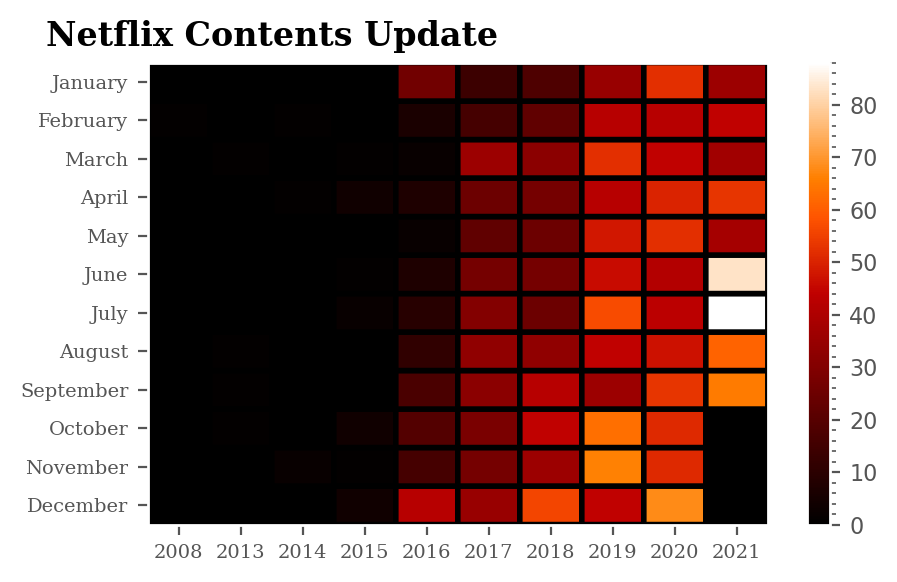

In [14]:
#Plotting to understand when the least amount of content is released to understand a good time period for release
netflix_date = df_tv[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.split(' ',3)[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df1 = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(5, 3), dpi=200)
plt.pcolor(df1, cmap='gist_heat', edgecolors='BLack', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [15]:
#In 2021, June and July had the most content being released, in contrast to 2020 where those two months had the least content released

In [16]:
#Wordcloud for Genres on Netflix
genres_tv=list(df_tv['listed_in'])

gen_tv=[]
for i in genres_tv:
    k = list(i.split(', '))
    for j in k:
        gen_tv.append(j)
g = Counter(gen_tv)

In [38]:
#Genre Finder

genres_tv=list(df_tv['listed_in'])

gen_tv=[]
for i in genres_tv:
    k = list(i.split(', '))
    for j in k:
        gen_tv.append(j)
g = Counter(gen_tv)

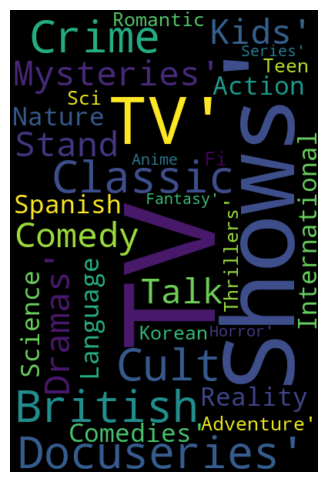

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
text = list(set(gen_tv))
text
plt.rcParams['figure.figsize'] = (6, 6)
wc = WordCloud(
background_color= 'black',
stopwords= STOPWORDS,
height= 600,
width= 400)
wc.generate(str(text))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()


<Axes: xlabel='rating', ylabel='count'>

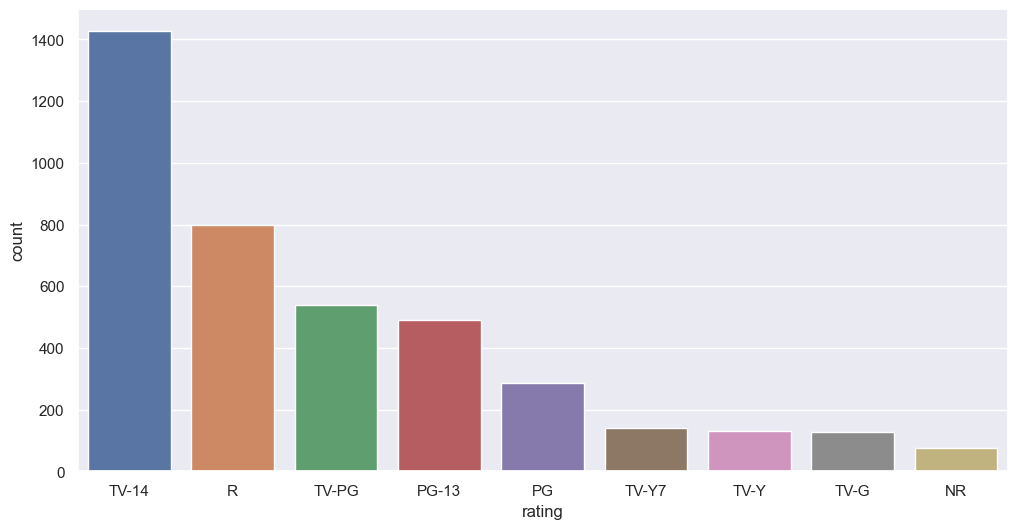

In [46]:
#To Discover how the shows and movies on Netflix are rated
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x = 'rating', data = df_movie, order = df_movie['rating'].value_counts().index[1:10])

In [52]:
#import the IMDB 1000 movies database to fetch the ratings for shows and movies on Netflix
#We are only fetching the relevant columns for our comparison in this case
imdb = pd.read_csv('imdb_top_1000.csv', 
                           usecols=['IMDB_Rating','Series_Title','Released_Year','Genre'])

ratings = pd.DataFrame({'Title':imdb.Series_Title,
                    'Release Year':imdb.Released_Year,
                    'Rating': imdb.IMDB_Rating,
                    'Genre':imdb.Genre})
#to get rid of any duplicate values
ratings.drop_duplicates(subset = ['Title','Release Year','Rating'], inplace = True) 

In [53]:
#perform inner join on the two datasets and filter out the rows with missing values
ratings.dropna()
joint_data = ratings.merge(df,left_on='Title',right_on='title',how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)
joint_data.head()

Title Release Year  Rating  \
0  The Lord of the Rings: The Return of the King         2003     8.9   
2                               Schindler's List         1993     8.9   
1                                   Pulp Fiction         1994     8.9   
3                                      Inception         2010     8.8   
4          The Lord of the Rings: The Two Towers         2002     8.7   

                       Genre show_id   type  \
0   Action, Adventure, Drama   s8405  Movie   
2  Biography, Drama, History   s7958  Movie   
1               Crime, Drama   s7803  Movie   
3  Action, Adventure, Sci-Fi    s341  Movie   
4   Action, Adventure, Drama   s8406  Movie   

                                           title           director  \
0  The Lord of the Rings: The Return of the King      Peter Jackson   
2                               Schindler's List   Steven Spielberg   
1                                   Pulp Fiction  Quentin Tarantino   
3                                      Inception  Christopher Nolan   
4          The Lord of the Rings: The Two Towers      Peter Jackson   

                                                cast  \
0  Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...   
2  Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...   
1  John Travolta, Samuel L. Jackson, Uma Thurman,...   
3  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   
4  Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...   

                         country       date_added  release_year rating  \
0     New Zealand, United States  January 1, 2020          2003  PG-13   
2                  United States    April 1, 2018          1993      R   
1                  United States  January 1, 2019          1994      R   
3  United States, United Kingdom   August 1, 2021          2010  PG-13   
4     New Zealand, United States  January 1, 2020          2002  PG-13   

  duration                                        listed_in  \
0  201 min             Action & Adventure, Sci-Fi & Fantasy   
2  195 min                           Classic Movies, Dramas   
1  154 min              Classic Movies, Cult Movies, Dramas   
3  148 min  Action & Adventure, Sci-Fi & Fantasy, Thrillers   
4  179 min             Action & Adventure, Sci-Fi & Fantasy   

                                         description  
0  Aragorn is revealed as the heir to the ancient...  
2  Oskar Schindler becomes an unlikely humanitari...  
1  This stylized crime caper weaves together stor...  
3  A troubled thief who extracts secrets from peo...  
4  Frodo and Sam head to Mordor to destroy the On...

In [67]:
import plotly.express as px

top_rated = joint_data[0:11]

# Define custom color scale
color_scale = ["#000000", "#831010", "#db0000"] 

fig = px.sunburst(top_rated, path=['title', 'country'],
                  values='Rating',
                  color='Rating',
                  color_continuous_scale=color_scale)

fig.show()

In [68]:
country_count = pd.DataFrame(joint_data['country'].value_counts())[0:10]
country_count


country
United States                       75
India                               28
United Kingdom                       9
United Kingdom, United States        5
United States, United Kingdom        4
United States, Canada                3
United States, Germany               2
Germany, United States               2
New Zealand, United States           2
Italy, United States                 2

In [79]:
#Countries with highest rated content
fig2 = px.funnel(country_count)
fig2.show()

Text(0.5, 1.0, 'Genres')

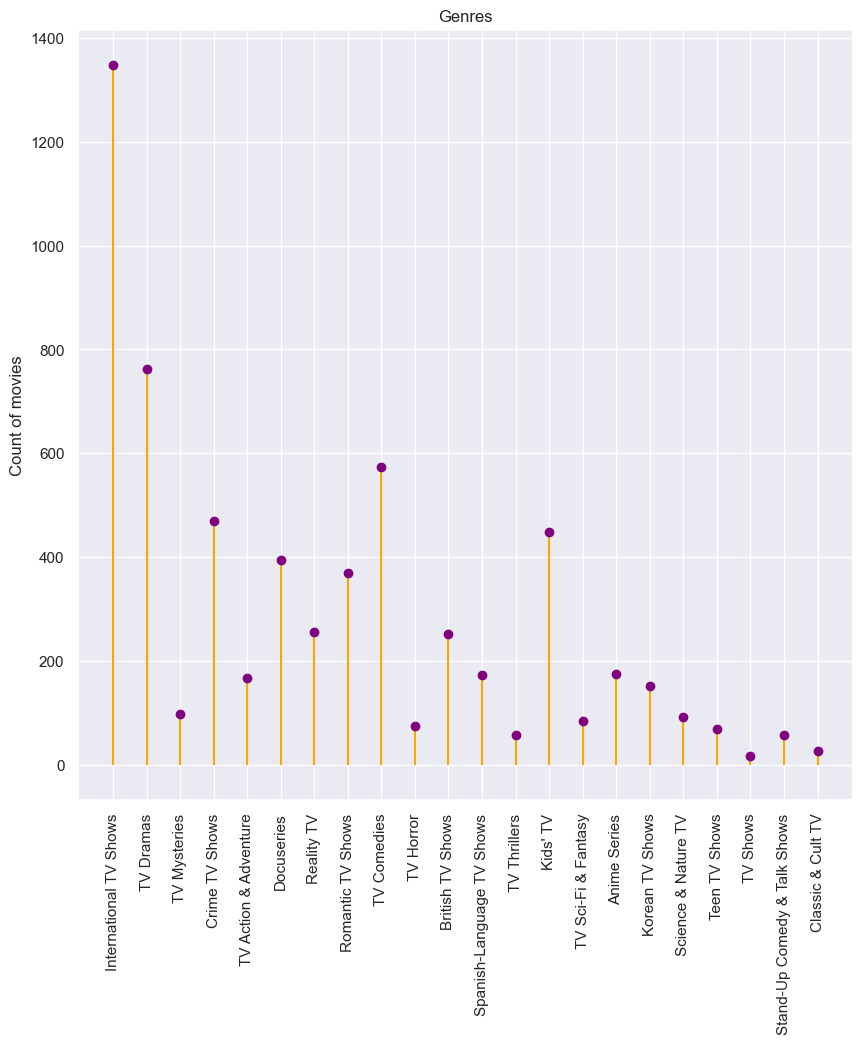

In [91]:
#To find the most popular genres for movies
g = dict(g) # transform outcome of counter to dictionary
x = list(g.keys())
y = list(g.values())

fig, ax = plt.subplots(figsize=(10, 10))
ax.vlines(x, ymin=0, ymax=y, color='orange') # draws the lines
ax.plot(x, y, "o", color='purple') # to set pins on top of the lines

# Set the tick locations and labels
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)

ax.set_ylabel("Count of movies")
ax.set_title("Genres")


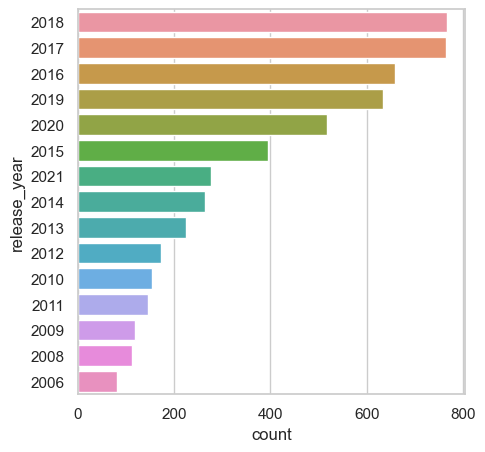

In [96]:
#Plotting the number of movies released in each year
plt.figure(figsize = (5,5))
sns.set(style = "whitegrid")
ax = sns.countplot(y = 'release_year', data = df_movie, order = df_movie['release_year'].value_counts().index[0:15])